In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import generator as gen
import optimizer as opt
import numpy as np
import scipy

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
kappa = 100
n = 20
d = 5
A = gen.generate_A(n, d)
alpha = 0.9
sigma = 1

tracking_errs = opt.gradient_descent_experiment(A, alpha, n, d, sigma, iters=50, projected=False)

In [7]:
rho = np.abs(1 - alpha/kappa)
err0 = np.linalg.norm(tracking_errs[0])

bounds = [rho**t * err0 + (1 - rho**t)/(1-rho) for t in range(len(tracking_errs))]

Text(0, 0.5, '$||x_t - x_t^*||_2$')

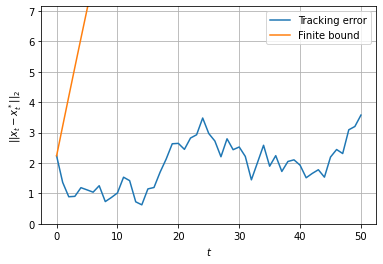

In [26]:
plt.plot(range(len(tracking_errs)), tracking_errs, label="Tracking error")
plt.plot(range(len(tracking_errs)), bounds, label="Finite bound")
#plt.axhline(1/(1-rho), linestyle='--', label="Asymptotic bound")
plt.grid()
plt.ylim([0, max(tracking_errs)*2])
plt.legend()

plt.xlabel("$t$")
plt.ylabel("$||x_t - x_t^*||_2$")